## Settings

Packages

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pyHSICLasso import HSICLasso
from ITMO_FS.wrappers.deterministic import qpfs_wrapper # Quadratic Programming Feature Selection
import pandas as pd
import time

Seed

In [9]:
np.random.seed(123) 

## Storage of results

In [10]:
def save_matrix_to_csv(matrix: np.ndarray, file_name: str, sample_sizes: range):
    """Function to save the matrix as a CSV file in the csv_results folder."""
    
    # Define the directory where you want to save the CSV file
    directory = "csv_results" # Ensure it saves in 'csv_results'

    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)

    # Construct the full file path
    full_file_path = os.path.join(directory, file_name)

    # Convert the matrix into a DataFrame for better representation
    df = pd.DataFrame(matrix, columns=[f'Sample_Size_{size}' for size in sample_sizes])

    # Save to CSV
    df.to_csv(full_file_path, index=False)
    
    print(f"Matrix saved to {full_file_path}")

## Models

### Model 1: HSIC Lasso

In [11]:
def data1_hsic_lasso(data1_number_samples: int, data1_step_size: int):
    #------------------------------------
    ## Initialization
    #------------------------------------

    # Record the start time
    start_time = time.time()

    # Initialize HSIC Lasso
    hsic_lasso_model = HSICLasso()

    # True variables (indices corresponding to X_1, X_2, X_3, X_4)
    data1_true_variables = [0, 1, 2, 3]
    data1_d_star = len(data1_true_variables)  # Number of true variables (4)
    # We want to compare it with the 4 most important variables found

    # Number of features to select
    data1_number_tested_features = 256

    # Range of sample sizes to test (from 25 to the max number of samples, with a step size chosen)
    data1_sample_sizes = range(25, data1_number_samples + 1, data1_step_size)
    number_data1_sample_sizes = len(data1_sample_sizes)

    # Store the average proportion of correctly selected features for each sample size
    data1_avg_proportion_correct_feat = []

    # Perform 30 runs for each sample size
    data1_number_runs = 30  # Number of runs for each sample size

    # Matrix to store the fraction of correctly selected features for each run and sample size
    correctly_selected_feat_matrix = np.zeros((data1_number_runs, number_data1_sample_sizes))
    row_index_matrix = 0

    # Iterate through different sample sizes
    for data1_n_train in data1_sample_sizes:
        print(f"\n--- Running {data1_number_runs} experiments with {data1_n_train} samples ---")
        
        # Store proportions for all 30 runs
        proportions_for_current_size = []
        
        for run in range(data1_number_runs):
            #------------------------------------
            # Model definition for each run
            #------------------------------------
        
            # Generate a certain number of samples for each feature (X1, X2, X3, ..., X_256)
            data1_X = np.random.randn(data1_number_samples, data1_number_tested_features)

            # Generate the response variable Y based on X_1, X_2, X_3, X_4
            data1_X1 = data1_X[:, 0]  # X_1
            data1_X2 = data1_X[:, 1]  # X_2
            data1_X3 = data1_X[:, 2]  # X_3
            data1_X4 = data1_X[:, 3]  # X_4

            # Random noise
            data1_E = np.random.normal(loc=0, scale=1, size = data1_number_samples)

            # Response variable Y (based on the defined model)
            data1_Y = -2 * np.sin(2 * data1_X1) + data1_X2**2 + data1_X3 + np.exp(-data1_X4) + data1_E

            # Select the first n_train samples from data1_X and data1_Y (random sampling)
            data1_X_train = data1_X[:data1_n_train, :]
            data1_Y_train = data1_Y[:data1_n_train]

            # Fit HSIC Lasso with d_star = 4
            hsic_lasso_model.input(data1_X_train, data1_Y_train)
            hsic_lasso_model.regression(num_feat=data1_d_star)

            # Get the selected variable indices
            selected_variables = hsic_lasso_model.get_index()

            # Calculate the number of correctly selected features
            correct_selections = set(selected_variables).intersection(data1_true_variables)
            proportion_correct = len(correct_selections) / data1_d_star
            
            # Store the proportion for this run
            proportions_for_current_size.append(proportion_correct)

            # Store the proportion for this run in the matrix
            correctly_selected_feat_matrix[run, row_index_matrix] = proportion_correct

        # Calculate the average proportion for this sample size over 30 runs
        avg_proportion = np.mean(proportions_for_current_size)
        data1_avg_proportion_correct_feat.append(avg_proportion)
        row_index_matrix += 1

    # End timing the function
    end_time = time.time()  # Record the end time
    
    # Calculate the total computation time
    computation_time = end_time - start_time
    print(f"\nTotal computation time: {computation_time:.2f} seconds")

    return data1_sample_sizes, correctly_selected_feat_matrix, data1_avg_proportion_correct_feat

#### Plot of the results

In [12]:
def data1_hsic_lasso_plot(data1_number_samples: int, data1_step_size: int, file_name: str):
    plt.figure(figsize=(10, 6))
    sample_sizes, _, avg_proportion_correct_feat = data1_hsic_lasso(data1_number_samples, data1_step_size)
    plt.plot(sample_sizes, avg_proportion_correct_feat, marker='o', linestyle='-', color='b', 
             label="Proportion of Correctly Selected Features")    
    plt.xlabel("Number of training samples")
    plt.ylabel("Fraction of correctly selected features")
    plt.title("Data 1 (Additive model): Proportion of Correctly Selected Features depending on the size of training samples")
    plt.grid(True)
    plt.legend()
     # Ensure the "plots" directory
    plots_directory = "plots"
    os.makedirs(plots_directory, exist_ok=True)
    # Construct the full file path for the plot
    file_path = os.path.join(plots_directory, file_name)
    # Save the figure
    plt.savefig(file_path) # Figure saved
    plt.show()

#### Example


--- Running 30 experiments with 25 samples ---
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 1.
Using Gaussian kernel for t

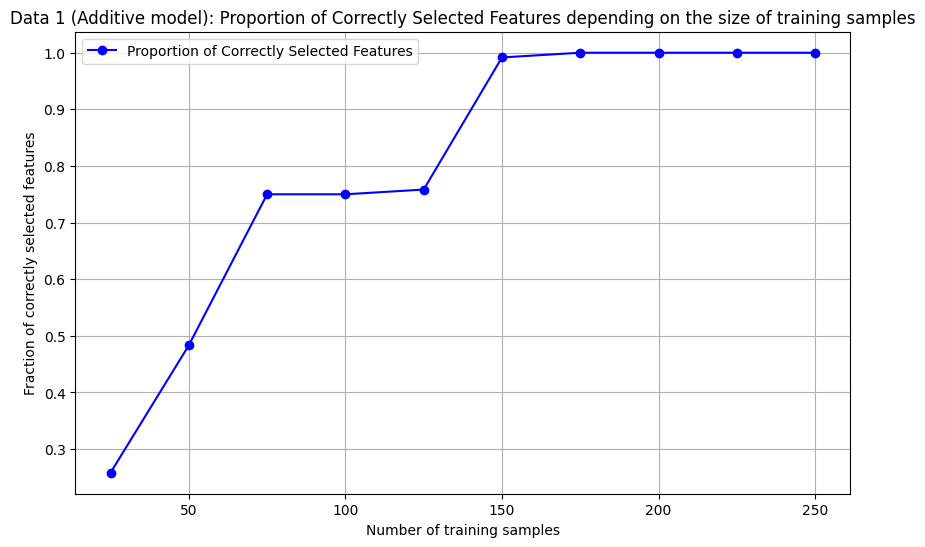

In [14]:
# Example usage of data1_hsic_lasso
data1_number_samples = 250
data1_step_size = 25


# Get the sample sizes, matrix, and average proportions
sample_sizes, feat_matrix, avg_proportions = data1_hsic_lasso(data1_number_samples, data1_step_size)

# Save the matrix to CSV in the csv_results folder
save_matrix_to_csv(feat_matrix, "hsic_lasso_results_matrix.csv", sample_sizes)

data1_hsic_lasso_plot(data1_number_samples, data1_step_size, "data1_hsic_lasso_correctly_selected_features.pdf")

## Others

In [4]:
n = 100  # Number of observations
p = 256  # Number of variables

np.random.seed(123)
data = np.random.normal(0, 1, size=(n, p))  
epsilon = np.random.normal(0, 1, n)  
Y = -2 * np.sin(data[:, 0]) + data[:, 1]**2 + data[:, 2] + np.exp(-data[:, 3]) + epsilon

df = pd.DataFrame(data, columns=[f'X_{i + 1}' for i in range(p)])
df['Y'] = Y